In [26]:
# https://quantumcomputing.stackexchange.com/questions/24050/how-to-implement-a-exponential-of-a-hamiltonian-but-non-unitary-matrix-in-qisk

# control gate: https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html

# circuit https://www.nature.com/articles/s41598-022-17660-8
import numpy as np
from numpy.linalg import eig, svd

A = np.array([
    [11, 5, -1, -1],
    [5, 11, 1, 1],
    [-1, 1, 11, -5],
    [-1, 1, -5, 11],
    ]).astype('complex')

In [7]:
vals,vecs=eig(A)
print('E-value:', vals)
# print('E-vector', v)

E-value: [16.+0.j  8.+0.j  4.+0.j 16.+0.j]


In [14]:
u, s, vh = np.linalg.svd(A, full_matrices=False)
s

array([16., 16.,  8.,  4.])

# "Our algorithms will generally assume that the singular values of A lie between 1/κ and 1; equivalently κ−2I ≤ A†A ≤ I"

https://arxiv.org/pdf/0811.3171

but in our case k = 16/4 = 2 => all the eigenvalues are out of the scope

*original* - how the algorithm works itself;

*with_error* - experiments with error

In [10]:
import json
  
# Opening JSON file
f = open('random_data.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
# print(data)

In [32]:
all_mse = []
all_abs = []
for example, mode in data.items():
    mses = []
    abss = []
    for _, value in mode.items():
        mses.append(value['mse'])
        abss.append(value['abs'])
    all_mse.append(mses)
    all_abs.append(abss)
    # mses = [value['mse'] for _, value in data.items()]

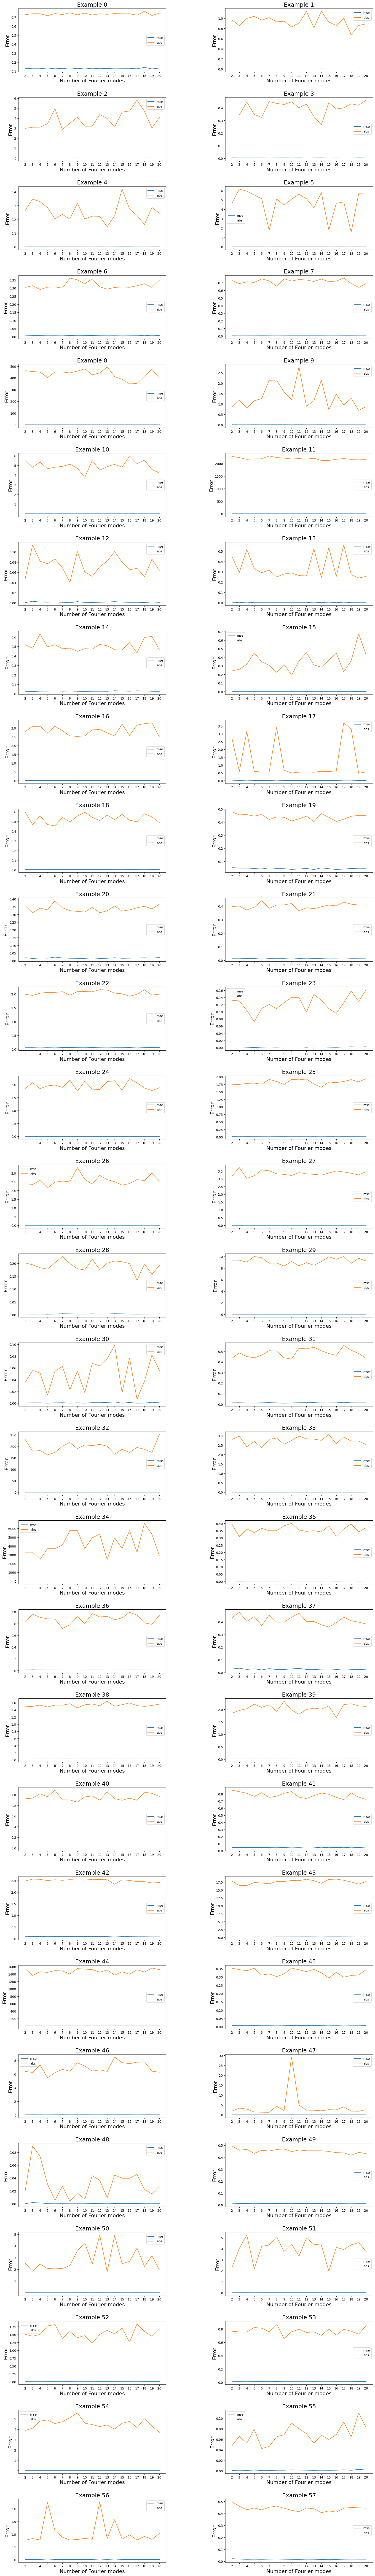

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,150))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (abs, mse) in enumerate(zip(all_abs, all_mse)):
    plt.subplot(30, 2, i+1)
    plt.plot(np.arange(2, 21), mse, label="mse")
    plt.plot(np.arange(2, 21), abs, label="abs")
    plt.title('Example ' + str(i), fontsize=18)
    plt.xlabel('Number of Fourier modes', fontsize=16)
    plt.ylabel('Error', fontsize=16)
    plt.xticks(np.arange(2, 21, step=1))
    # plt.yticks(np.arange(0, 1, step=0.1))
    plt.legend()
    # plt.show()